In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [77]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
covid_data_path = os.path.join(raw_data_path, 'covid-19-data.csv')
covid_df = pd.read_csv(covid_data_path)

## EDA PART - 1

In [78]:
covid_df.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [79]:
covid_df[['Country', 'Region']].nunique()

Country    211
Region       6
dtype: int64

In [80]:
#Getting the proportion of countries per region which implies EURO has the highest proportion with about 32% of countries
covid_r = covid_df.Region.value_counts(normalize=True)
covid_r

EURO     0.328205
AMRO     0.213935
AFRO     0.161538
WPRO     0.122074
EMRO     0.111260
SEARO    0.062988
Name: Region, dtype: float64

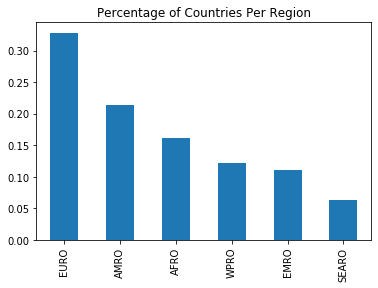

In [81]:
covid_r.plot(kind='bar', title='Percentage of Countries Per Region')

In [82]:
covid_df[['Deaths', 'Confirmed']].describe()

,Deaths,Confirmed
count,9042.000000,9042.000000
mean,14.492037,220.745742
std,101.195444,1481.635096
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,1.000000,33.000000
max,2395.000000,35386.000000


In [83]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af[['Deaths','Confirmed']].describe()

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000


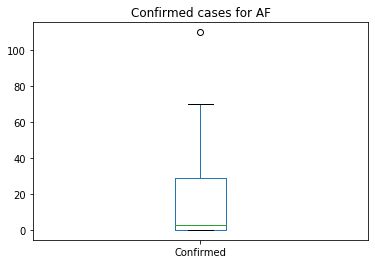

In [131]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af.Confirmed.plot(kind='box', title='Confirmed cases for AF')

In [85]:
#Number of Countries in the EMRO Region amounts to 22 Countries
covid_af = covid_df.loc[(covid_df['Region'] == 'EMRO')]
covid_af[['Country', 'Region']].nunique()

Country    22
Region      1
dtype: int64

In [86]:
def summarystats (country, code):
    covid_any = covid_df[covid_df['Country'] == code]
    #return print(country)
    return covid_any[['Deaths', 'Confirmed']].describe(); return print(country)

In [128]:
summarystats('Afganistan', 'AF')

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000


## EDA Part-2

### Distributions Univariate

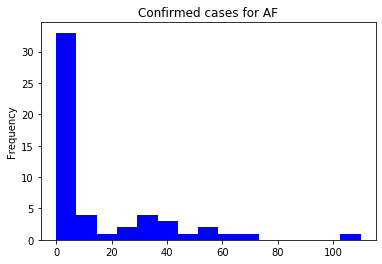

In [157]:
#Univariate Histogram distribution for AF, which is rightly skewed, you can optionally specify the number of bins
covid_af.Confirmed.plot(kind='hist', title='Confirmed cases for AF', color='blue', bins=15)

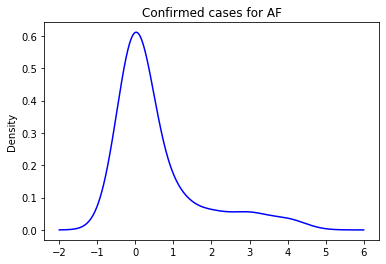

In [158]:
#kde plot indicates positive skweness as well with 0 being the most frequent occuring value
covid_af.Deaths.plot(kind='kde', title='Confirmed cases for AF', color='blue')

In [107]:
print('Skewness for Deaths in AF is : {0:.2f}'.format(covid_af.Deaths.skew()))
print('Skewness for Confirmed in AF is : {0:.2f}'.format(covid_af.Confirmed.skew()))

Skewness for Deaths in AF is : 4.98
Skewness for Confirmed in AF is : 5.28


### Distributions Bivariate

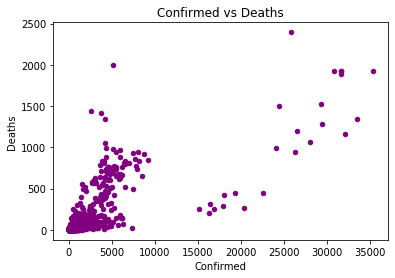

In [115]:
#Checking the relationship between confirmed cases and Death cases in AF to see of any pattern exits, you can set alpha value to control opacity
#As confirmed cases increase number of deaths increase as well in 10,000 confirmed cases there was about 1000 deaths in AF
covid_df.plot.scatter(x='Confirmed', y='Deaths', color='purple', title='Confirmed vs Deaths')

### Groupings and Aggregations, Crosstabs and pivot tables

In [ ]:
#You can compute the mean, median, sum, std and more using groupings and aggregations

In [136]:
covid_df.groupby(['Region']).Confirmed.median()

Region
AFRO      0
AMRO      1
EMRO      8
EURO     14
SEARO     0
WPRO      2
Name: Confirmed, dtype: int64

In [138]:
covid_df.groupby(['Region']).Deaths.mean()

Region
AFRO      0.379572
AMRO     15.760813
EMRO      5.645291
EURO     30.338655
SEARO     1.817699
WPRO      3.883105
Name: Deaths, dtype: float64

In [139]:
covid_df.groupby(['Region']).Deaths.sum()

Region
AFRO       550
AMRO     30245
EMRO      5634
EURO     89317
SEARO     1027
WPRO      4252
Name: Deaths, dtype: int64

In [161]:
covid_df.groupby(['Region'])['Confirmed', 'Deaths'].sum()

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
Region,,
AFRO,11843,550
AMRO,707121,30245
EMRO,114910,5634
EURO,1013093,89317
SEARO,22525,1027
WPRO,125779,4252


C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


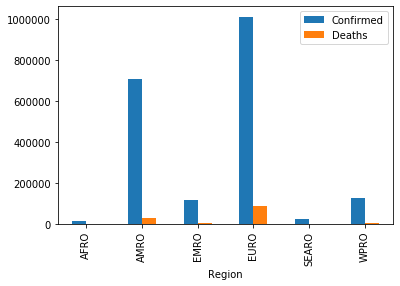

In [162]:
covid_df.groupby(['Region'])['Confirmed', 'Deaths'].sum().plot(kind='bar')

In [164]:
covid_df.groupby(['Region','Country'])['Confirmed', 'Deaths'].sum()

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths
Region Country                   
AFRO   AO              19       2
       BF             528      28
       BI               5       0
       BJ              35       1
       BW              13       1
...                   ...     ...
WPRO   PF              55       0
       PG               2       0
       PH            5660     362
       SG            3699      10
       VN             267       0

[211 rows x 2 columns]

In [147]:
pd.crosstab(covid_df.Region, covid_df.Country)

Country,AD,AE,AF,AG,AI,AL,AM,AO,AR,AT,...,VE,VG,VI,VN,XK,YE,YT,ZA,ZM,ZW
Region,,,,,,,,,,,,,,,,,,,,,
AFRO,0,0,0,0,0,0,0,27,0,0,...,0,0,0,0,0,0,34,43,30,28
AMRO,0,0,0,35,22,0,0,0,45,0,...,34,22,35,0,0,0,0,0,0,0
EMRO,0,79,53,0,0,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
EURO,46,0,0,0,0,39,47,0,0,52,...,0,0,0,0,35,0,0,0,0,0
SEARO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WPRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,84,0,0,0,0,0,0


In [159]:
#using crosstab
pd.crosstab(covid_df.Region, covid_df.Deaths.sum())

col_0,131037
Region,
AFRO,1449
AMRO,1919
EMRO,998
EURO,2944
SEARO,565
WPRO,1095


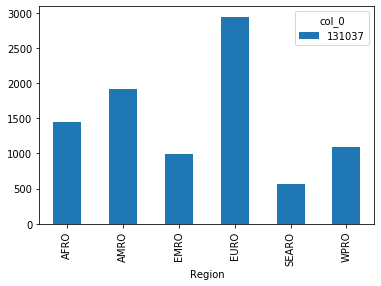

In [152]:
#Crosstab sum of deaths per Region
pd.crosstab(covid_df.Region, covid_df.Deaths.sum()).plot(kind='bar')

In [190]:
#Using Pivot Tables, very useful for numerical features of categorical variables
covid_df.pivot_table(index='Region', columns='Country', values='Confirmed', aggfunc='sum')

Country,AD,AE,AF,AG,AI,AL,AM,AO,AR,AT,...,VE,VG,VI,VN,XK,YE,YT,ZA,ZM,ZW
Region,,,,,,,,,,,,,,,,,,,,,
AFRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,221.0,2506.0,48.0,23.0
AMRO,NaN,NaN,NaN,23.0,3.0,NaN,NaN,NaN,2477.0,NaN,...,193.0,3.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMRO,NaN,5365.0,794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
EURO,673.0,NaN,NaN,NaN,NaN,494.0,1135.0,NaN,NaN,14370.0,...,NaN,NaN,NaN,NaN,397.0,NaN,NaN,NaN,NaN,NaN
SEARO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WPRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,NaN


## Your HomeWork is to Carry out univariate and bivariate analysis distributions per Region